<a href="https://colab.research.google.com/github/junhojjangjjangman/NLP/blob/main/%5BNotebook_Student%5D_Module_24_(Data_collection_and_processing_for_NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 수집 및 준비
## 1. 인터넷에서 데이터 수집
### 1.1 웹 스크래핑(Web scraping)
인터넷은 자연어처리(Natural Language Processing, NLP) 프로젝트에 사용할 수 있는 풍부한 데이터를 제공합니다. 그러나 일반적인 데이터는 NLP 프로젝트에 바로 사용할 수가 없습니다. 쉽게 다운로드하고 추가로 작업을 쉽게할 수 있는 워드문서 또는 스프레드시트로 만들어지지 않았기 때문입니다. 따라서 자체적으로 데이터를 수집하고 처리하는 방법을 학습해야 합니다.
이 노트북 연습에서는 '웹 스크래핑' 이라는 프로세스를 사용하여 웹 사이트에서 원시 데이터를 수집하는 방법을 학습합니다. 여러분이 원하는 인터넷 웹 사이트의 정보를 수집할 수 있는 웹스크래퍼를 구축할 것입니다!

### 1.1.1 필수 라이브러리/패키지 가져오기
먼저, 우리는 필요한 패키지를 가져옵니다:
- `requests` 패키지를 사용하면 파이썬 스크립트가 웹 사이트와 통신하고 해당 사이트에서 정보를 '요청'할 수 있습니다. 
- 뷰티풀 수프(beautiful soup)패키지는 `bs4`라고도 불리며 웹사이트에서 정보를 얻고 추출하는데 유용한 기능을 제공합니다.

In [ ]:
import requests
import bs4

print ("You have successfully imported requests version "+requests.__version__)
print ("You have successfully imported beautifulsoup version "+bs4.__version__)

You have successfully imported requests version 2.23.0
You have successfully imported beautifulsoup version 4.6.3


네! 패키지를 가져왔습니다. 이제 몇몇 웹사이트를 스크래핑할 준비가 되었습니다.

### 1.1.2 웹 사이트에 대한 정보 찾기

이제 https://en.wikipedia.org/wiki/Jupiter 를 방문하여 페이지 내용을 살펴보십시오.

페이지가 표시되면 **ctrl-shift-i (또는 F12)를 눌러 사이트의 HTML을 확인합니다.** 
* 참고: HTML은 하이퍼텍스트 마크업 언어(Hypertext Markup Language)의 약자이며 컴퓨터 브라우저(크롬, 인터넷 익스플로러, 사파리 등)가 어떻게 정보를 표시해애 하는지를 이해하는 방법이다.

웹 사이트를 방문할 때, 컴퓨터는 HTML을 사용하여 인터넷에 요청('GET' 요청이라고 함)을 전송하고 응답을 기다립니다. 최종적인 응답은 응답 코도와 요청된 정보를 보내고, 컴퓨터는 이 정보를 브라우저에 표시합니다.

### 실습: 웹 사이트 [https://en.wikipedia.org/wiki/Jupiter](https://en.wikipedia.org/wiki/Jupiter) 에 방문하고 ctrl-shift-i (또는 F12)를 지금 누르세요! 

<각 괄호> 안에 보이는 모든 것에 세심한 주의를 기울이세요. 이러한 태그는 브라우저에 포함된 정보를 표시할 위치와 방법을 알려줍니다. 태그는 웹 페이지의 섹션을 식별하는데 사용되며, 나중에 이 태그를 사용하여 관심있는 정보를 찾을 것입니다.

### 실습: HTML 코드를 보고 다양한 태그를 식별할 수 있나요?
  
`requests.get()` 함수를 사용하여 웹 사이트를 호출합니다. `request.get()` 함수는 'GET' 요청을 웹 사이트 주로소 전송하고, 응답을 검색하려고 시도합니다. `request.get()` 함수는 'Response [200]'을 반환해야 합니다. 이는 사이트에서 정보를 성공적으로 수신했음을 의미합니다.

In [ ]:
base_url = 'https://en.wikipedia.org/wiki/Jupiter'
r = requests.get(base_url)
r

<Response [200]>

### 작업: base_url을 'https://en.wikipedia.org/wiki/Jupiter' 에서 'https://en.wikipedia.org/wiki/Jus21' 으로 변경해 보십시오. 
응답 코드는 어떻게 되었습니까? 

이러한 응답 코드는 연결 문제를 해결하는데 도움이 되지만, 지금은 응답 코드 200은 GET 요청이 성공했다는 것을 알기만 하면 됩니다!

<em> 링크가 깨지거나 제대로 연결되지 않는 경우 위의 코드에서 `<Response [404]>` 를 받을 수 있습니다. </em>

### 이제 base_url을 다시 'https://en.wikipedia.org/wiki/Jupiter' 로 변경하여 나머지 노트북에서 계속 사용합니다.

연결이 설정되었습니다! 우리는 접근 할 수 있습니다!

### 1.1.3 웹 사이트에서 데이터를 얻기 위한 beautifulsoup 사용

이제 `bs4`를 사용하여 웹 사이트에 요청하여 출력을 읽을 수 있습니다. 

뷰티풀 수프는 HTML, XML 및 기타 마크 업 언어에서 데이터를 가져오는 파이썬 라이브러리입니다.
*참고: 주피터 노트북의 이 섹션은 'markup' 형식으로 작성되었습니다.

브라우저와 마찬가지로, bs4는 HTML을 이해하고 < 태그 >를 읽을 수 있습니다;

아래 코드를 참조하십시오!

In [ ]:
#`r.text`에는 이전에 GET 요청을 했을 때 반환된 원시 HTML이 포함되어 있습니다. 
#`'html5lib'`는 BeautifulSoup에 HTML 정보를 읽고 있다고 알려줍니다. 
soup = bs4.BeautifulSoup(r.text,'html5lib')

기본적으로 우리는 GET 요청에서 초기 응답을 받아 BeautifulSoup에 응답을 읽고 이해하도록 요청하고, 이 모든 것을 변수 `soup`으로 저장합니다!

### 1.1.4 beautifulsoup을 사용하여 특정 태그 검색

여기서부터 흥미로워집니다. BeautifulSoup은 특정 태그를 검색하는 데 사용할 수 있습니다.

beautifulsoup을 사용하여 위키피디아(Wikipedia) 웹 사이트의 모든 제목을 찾아봅시다!

In [ ]:
headers = []
for url in soup.findAll("h3"):
    headers.append(url.text)
    print(url.text)

Composition
Size and mass
Internal structure
Atmosphere
Magnetosphere
Planetary rings
Pre-telescopic research
Ground-based telescope research
Space-based telescope research
Radiotelescope research
Exploration
Galilean moons
Classification
Impacts

		Personal tools
	

		Namespaces
	

		Views
	

				Search
			

		Navigation
	

		Contribute
	

		Tools
	

		Print/export
	

		In other projects
	

		Languages
	


이 코드 조각에서 우리는 모든 `<h3>` 태그를 찾습니다. 그런 다음 발견한 모든 태그에 루프를 사용하여 텍스트를 추출합니다.

*참고: `<h3>` 태그는 [header](https://www.w3docs.com/learn-html/html-header-tag.html) 를 정의하며, HTML 문서의 텍스트 제목이 따라야할 규칙입니다. 다른 위치에 `<h3>` 태그와 구분하기 위해 `class=tag-name`으로 '이름'을 지정할 수 있습니다. 이 노트북 연습에서는 클래스가 없는 `<h3>` 헤더를 검색합니다.

이제 `headers`의 모든 링크를 수집 할 수 있는지 확인해 보겠습니다. 변수 headers를 표시하고 이 변수에 정보가 추가되었는지 확인해보세요!

In [ ]:
# your code here
headers

['Composition',
 'Size and mass',
 'Internal structure',
 'Atmosphere',
 'Magnetosphere',
 'Planetary rings',
 'Pre-telescopic research',
 'Ground-based telescope research',
 'Space-based telescope research',
 'Radiotelescope research',
 'Exploration',
 'Galilean moons',
 'Classification',
 'Impacts',
 '\n\t\tPersonal tools\n\t',
 '\n\t\tNamespaces\n\t',
 '\n\t\tViews\n\t',
 '\n\t\t\t\tSearch\n\t\t\t',
 '\n\t\tNavigation\n\t',
 '\n\t\tContribute\n\t',
 '\n\t\tTools\n\t',
 '\n\t\tPrint/export\n\t',
 '\n\t\tIn other projects\n\t',
 '\n\t\tLanguages\n\t']

목록에 있는 헤더에 대해 이상한 점을 발견하셨나요? 목록의 일부 항목은 관련이 없는 정보입니다. 이는 도구 모음의 일부 헤더가 목록에 포함되어 있기 때문입니다. 이 목록을 제거해 봅시다.

In [ ]:
i = len(headers) - 1
counter = 0
while counter <= i:
    if headers[counter].startswith('\n'):
        headers.pop(counter)
        counter -= 1
    counter += 1
    i = len(headers) -1
print(headers)

['Composition', 'Size and mass', 'Internal structure', 'Atmosphere', 'Magnetosphere', 'Planetary rings', 'Pre-telescopic research', 'Ground-based telescope research', 'Space-based telescope research', 'Radiotelescope research', 'Exploration', 'Galilean moons', 'Classification', 'Impacts']


이제 각 헤더 뒤의 단락 태그에서 각 제목의 단락 텍스트를 추출합니다. 하나의 헤더에서 대해 어떠한 방법으로 수행되는지 확인하고, 원하는 모든 헤더에 대해 수행할 수 있습니다.

이전과 동일한 방법으로 첫 번째 일크를 방문하여 F12를 눌러 페이지 소스를 확인합니다. 기본 텍스트를 포함하는 요소를 선택하면 패널에서 기본 소스를 볼 수 있습니다. 텍스트는 `<p>` 태그로 둘러싸여 있습니다. 이 정보를 사용하여 텍스트를 추출할 것입니다. 지금 시도해 봅시다!
  
이 페이지에서 정보는 `<p>` 태그 내에 있습니다. 우리는 모든 단락을 찾고 싶기 때문에 `<p>` 태그를 찾아`.get_text()`를 호출하여 실제 단어를 검색합니다!

In [ ]:
r = requests.get(base_url)
soup = bs4.BeautifulSoup(r.text,'html5lib')
deet = soup.find('h3', text = headers[0]) # 클래스 'entry-content content' 의 div 태그 검색
para = deet.find_next_sibling('p') # 이 태그 안에서 모든 p 태그 검색
print(para.get_text())

Jupiter's upper atmosphere is about 90% hydrogen and 10% helium by volume. Since helium atoms are more massive than hydrogen molecules, Jupiter's atmosphere is approximately 24% helium by mass.[40] The atmosphere contains trace amounts of methane, water vapour, ammonia, and silicon-based compounds. There are also fractional amounts of carbon, ethane, hydrogen sulfide, neon, oxygen, phosphine, and sulfur. The outermost layer of the atmosphere contains crystals of frozen ammonia. Through infrared and ultraviolet measurements, trace amounts of benzene and other hydrocarbons have also been found.[41] The interior of Jupiter contains denser materials—by mass it is roughly 71% hydrogen, 24% helium, and 5% other elements.[42][43]



위의 코드에서는 `find_next_sibling` 함수를 사용하여 "구성(Composition)"으로 레이블된 헤더 다음에 오늘 단락 태그를 가져옵니다. 위의 코드 조각에서 하나의 단락만을 어떻게 얻을 수 있는지 보여줍니다. 그러나 [link](https://en.wikipedia.org/wiki/Jupiter) 를 다시 한 번 살펴보면 "구성(Composition)" 헤더에 3개의 단락이 있다는 것을 알 수 있습니다. 어떻게 모든 문단을 얻을 수 있습니까?

해결 방안은 다음 태그들을 반복적으로 살펴보는 것입니다. 설정한 규칙은 다음과 같습니다:

- 이웃 태그가 `<h2>` 또는 `<h3>` 태그인 경우다음 헤더로 이동합니다.

- 태그가 `<p>` 태그인 경우에만 텍스트를 출력합니다.

결과를 보기 위해 다음 코드 조각을 실행해 보세요. 

In [ ]:
r = requests.get(base_url)
soup = bs4.BeautifulSoup(r.text,'html5lib')
deet = soup.find('h3', text = headers[0]) # 클래스 'entry-content content' 의 div 태그 검색

for para in deet.find_next_siblings(): # 이 태그 안에서 모든 p 태그 검색
    if para.name == "h2" or para.name == "h3":
        break
    elif para.name == "p":
        print(para.get_text())


Jupiter's upper atmosphere is about 90% hydrogen and 10% helium by volume. Since helium atoms are more massive than hydrogen molecules, Jupiter's atmosphere is approximately 24% helium by mass.[40] The atmosphere contains trace amounts of methane, water vapour, ammonia, and silicon-based compounds. There are also fractional amounts of carbon, ethane, hydrogen sulfide, neon, oxygen, phosphine, and sulfur. The outermost layer of the atmosphere contains crystals of frozen ammonia. Through infrared and ultraviolet measurements, trace amounts of benzene and other hydrocarbons have also been found.[41] The interior of Jupiter contains denser materials—by mass it is roughly 71% hydrogen, 24% helium, and 5% other elements.[42][43]

The atmospheric proportions of hydrogen and helium are close to the theoretical composition of the primordial solar nebula. Neon in the upper atmosphere only consists of 20 parts per million by mass, which is about a tenth as abundant as in the Sun.[44] Helium is al

이제 웹 페이지에서 텍스트를 추출하는 방법을 확인하였으므로, 여러분들의 차례입니다!  
### 실습 1: `headers` 항목을 반복할 수 있는 함수를 작성하십시오.

각 헤더의 내용을 추출합니다. 모든 텍스트를 변수 "all_para"에 결합합니다.

In [ ]:
# your code here
r = requests.get(base_url)
all_para =""
soup = bs4.BeautifulSoup(r.text,'html5lib')
deet = soup.find('h3', text = headers[0]) # 클래스 'entry-content content' 의 div 태그 검색

for para in deet.find_next_siblings(): # 이 태그 안에서 모든 p 태그 검색
    if para.name == "h2" or para.name == "h3":
        break
    elif para.name == "p":
        all_para += para.get_text()
        all_para += '\n'

In [ ]:
print(all_para)

Jupiter's upper atmosphere is about 90% hydrogen and 10% helium by volume. Since helium atoms are more massive than hydrogen molecules, Jupiter's atmosphere is approximately 24% helium by mass.[40] The atmosphere contains trace amounts of methane, water vapour, ammonia, and silicon-based compounds. There are also fractional amounts of carbon, ethane, hydrogen sulfide, neon, oxygen, phosphine, and sulfur. The outermost layer of the atmosphere contains crystals of frozen ammonia. Through infrared and ultraviolet measurements, trace amounts of benzene and other hydrocarbons have also been found.[41] The interior of Jupiter contains denser materials—by mass it is roughly 71% hydrogen, 24% helium, and 5% other elements.[42][43]

The atmospheric proportions of hydrogen and helium are close to the theoretical composition of the primordial solar nebula. Neon in the upper atmosphere only consists of 20 parts per million by mass, which is about a tenth as abundant as in the Sun.[44] Helium is al

### 1.2 데이터 저장
축하합니다! 여러분 자신만의 스크레이퍼를 구축하고 여러 웹 페이지에서 데이터를 수집하는데 사용했습니다. 이제 데이터에 접근할 때마다 웹 사이트를 스크랩할 필요가 없도록 데이터를 저장하는 방법이 필요합니다. 수집된 정보를 저장하면 웹 사이트가 삭제되었거나 변경되는 경우에도 데이터가 보존됩니다.

### 작업 2: 테이터를 텍스트 파일로 저장하기 위한 코드를 작성합니다. 

도움이 필요한 경우 https://stackoverflow.com/questions/899103/writing-a-list-to-a-file-with-python 을 살펴보거나 원하는 검색 엔진을 사용하여 직접 검색하십시오.

*참고: open(filename)으로 파일 개체를 만들어야 합니다. 그런 다음 .write() 속성을 사용하여 텍스트를 파일에 기록합니다. 파일 쓰기에 대한 자세한 내용은 https://www.guru99.com/reading-and-writing-files-in-python.html 을 참조하십시오.

In [ ]:
with open('./wiki.txt', 'wb') as file_handler:
        file_handler.write(all_para.encode('utf8'))

좋습니다! 이제 디렉토리 폴더에 있는 파일을 확인하고 필요한 정보가 수집되었는지 확인하십시오.

### 1.3 기타 데이터 소스
축하합니다! 이제 모든 웹 사이트에서 텍스트를 다운로드할 수 있습니다. 웹 사이트마다 html 구조가 다르기 때문에 스트랩하는 각 사이트마다 코드를 수정해야 합니다.

어떻게 하면 웹 사이트의 차이점을 신경쓰지 않고 많은 데이터를 얻을 수 있을까요?

#### 데이터를 많이 얻을 수 있는 방법은 무엇입니까?  
  
다행히도 이미 다른 사람들에 의해 수집 된 많은 양의 데이터가 있습니다. 이러한 파일은 .csv 또는 .txt와 같은 문서 형식으로 저장할 수 있으며 간단한 스트립트로 쉽게 다운로드할 수 있습니다.

누구나 쉽게 다운로드할 수 있고, AI에 사용할 수 있는 흥미로운 데이터 세트를 수집하는 사이트가 있습니다.
여러분의 프로젝트에 무료로 사용할 수 있는 데이터를 확인해 보세요: 
- https://www.figure-eight.com/data-for-everyone/.  
- https://github.com/niderhoff/nlp-datasets

데이터 세트의 일부를 살펴보고 작업하고 싶은 것들을 생각해 보십시오. 

### 트윗 데이터 다운로드 
지금은 트위터에서 소셜 미디어의 반응을 확인하는 데이터 세트를 살펴볼 것입니다.

이 데이터 세트는 트윗이 재난과 관련이 있는지 없는지에 대한 표시로 구성됩니다.

이 데이터 세트를 AI 시스템을 훈련시키는 데 어떻게 사용할 수 있을까요? 이 데이터 세트가 도움이 될 수 있을까요?

트윗을 분류할 수 있게 되면 실제 재난 시 노이즈 정보를 걸려내고 유용한 트위 정보를 실시간으로 얻을 수 있습니다. 이러한 트윗에는 피해야 할 장소, 도움이되는 방법, 도움을 요청하는 방법 등 유용한 정보가 포함될 수 있습니다.

아래 코드는 `urllib` 라이브러리를 사용하여 'url'에 있는 .csv 파일을 다운로드하고 저장합니다.

In [ ]:
import urllib

url = 'https://sl2files.sustainablelivinglab.org/DatasetSocialMedia-Disaster-tweets-DFE.csv'

csv = urllib.request.urlopen(url).read()
with open('./[Dataset] Module 24 (socialmedia disaster tweets DFE).csv', 'wb') as fx:
    fx.write(csv)

In [ ]:
import pandas as pd

df = pd.read_csv()

좋습니다! 이제 데이터를 다운로드했습니다! 방금 만든 csv 파일을 확인해 보세요! 

데이터 세트가 어떻게 구성되는지 확인하십시오. 
어떤 헤더를 볼 수 있습니까?

## 2.1 텍스트 처리
원시(raw) 데이터 형태의 트윗은 텍스트의 문자열일 뿐입니다. 사람은 텍스트의 문자열을 쉽게 읽고 이해할 수 있지만, 컴퓨터는 그렇게 하는 데 훨씬 더 어려움을 겪습니다. 따라서 이러한 문자열에 대하여 컴퓨터가 인식하고 작업할 수 있는 형태로 분할하는 전처리를 수행해야 합니다.

텍스트를 전처리하면 텍스트를 분석하고 시각화할 수 있으며 컴퓨터가 텍스트를 분류하는 데 사용할 수있는 트렌드 및 기능을 찾을 수 있습니다.

트윗 재난에 대한 데이터 세트를 사용하여 연습을 해보겠습니다.  

먼저 필요한 패키지를 가져옵니다:
- pandas 패키지는 데이터 프레임이라는 구로조 파일을 프로그램에 로드하는 데 도움이됩니다.
- nltk 패키지는 텍스트를 가공하고 시각화할 수 있도록 해줍니다.

In [ ]:
import pandas as pd
import nltk

print ("You have successfully imported pandas version "+pd.__version__)
print ("You have successfully imported nltk version "+nltk.__version__)

You have successfully imported pandas version 1.3.5
You have successfully imported nltk version 3.7


In [ ]:
# 자연 재해에 대한 트윗이 포함된 csv 파일을 pandas dataframe으로 읽습니다.
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/[Dataset] Module 24 (socialmedia disaster tweets DFE).csv',encoding='ISO-8859-1')

print ("You have successfully loaded your csv file")

You have successfully loaded your csv file


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 자료를 간단히 살펴봅시다!  
`.head(5)` 를 사용하면 pandas 데이터프레임에서 데이터의 첫 5줄을 살펴볼 수 있습니다.

In [ ]:
# your code here
df_raw.head(5)

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


데이터 프레임의 첫 10줄은 어떻게 확인할 수 있을까요? 위의 코드 블록에서 시도해보세요!

판다스 데이터프레임은 스프레드시트처럼 보이며 각 열은 데이터의 범주가 포함되어 있으며, 각 행은 단일 트윗의 정보를 나타냅니다. 

많은 열이 있지만 트윗이 저장되어 있는 열만 고려하겠습니다.

위의 데이터 프레임을 참조하세요! 트윗을 보기 위해 어떤 열을 살펴봐야 하는지 알 수 있을까요? 열 이름을 대괄호 안에 문자열 형식으로 넣으면 해당 열만 선택할 수 있습니다.(예: `df_raw['column_name']`)

### 실습: 다른 열을 살펴보고 포함된 데이터를 확인하십시오.

In [ ]:
# your code here
df_raw['text'].head(10) # 특정 열 가져오기

0                   Just happened a terrible car crash
1    Our Deeds are the Reason of this #earthquake M...
2    Heard about #earthquake is different cities, s...
3    there is a forest fire at spot pond, geese are...
4               Forest fire near La Ronge Sask. Canada
5    All residents asked to 'shelter in place' are ...
6    13,000 people receive #wildfires evacuation or...
7    Just got sent this photo from Ruby #Alaska as ...
8    #RockyFire Update => California Hwy. 20 closed...
9             Apocalypse lighting. #Spokane #wildfires
Name: text, dtype: object

트윗의 몇 개의 무작위 표본을 살펴보겠습니다. .sample() 사용하여 샘플을 볼 수 있습니다.

In [ ]:
list(df_raw['text'].sample()) # 실행할 때 마다 결과가 바뀜

['Russian #ushanka #winter #military fur hat (xl61-62) with soviet badge LINK:\nhttp://t.co/74YFQxvAK0 http://t.co/KXrEHVt6hL']

5개의 무작위 표본을 어떻게 보시겠습니까? `.head(5)`를 이전에 사용했던 것을 기억하세요? .sample()에서 사용해 보십시오!

각 행은 단일 트윗에서 수집된 데이터이므로 데이터 세트에서 전체 트윗 수를 어떻게 찾을 수 있습니까? 
힌트: `len(dataframe)` 을 사용하여 데이터 프레임의 행 수를 계산합니다.

In [ ]:
# your code here
len(df_raw)

10876

### 텍스트 데이터를 중심으로

잘하셨습니다! 이제 텍스트에 집중하기 위해 나머지 필요하지 않은 열은 제외하고 텍스트만 포함하는 새로운 데이터 프레임을 만들어 보겠습니다. 데이터 프레임의 이름 앞에 'df'를 넣어 데이터 프레임 형식으로 작업을 하고 있음을 기억하는데 도움이됩니다.`.copy()` 를 사용하여 원본 데이터 세트를 수정하지 않도록합니다.

In [ ]:
df_text = df_raw['text'].copy()

방금 생성한 데이터 프레임에 예상한 내용이 포함되어 있는지 확인합니다. 새 데이터 프레임의 처음 몇 줄을 출력하고 '텍스트'열에 트윗만 포함되어 있는지 확인합니다.

In [ ]:
# your code here
df_text.head()

0                   Just happened a terrible car crash
1    Our Deeds are the Reason of this #earthquake M...
2    Heard about #earthquake is different cities, s...
3    there is a forest fire at spot pond, geese are...
4               Forest fire near La Ronge Sask. Canada
Name: text, dtype: object

## 2.2 NLP 데이터 전처리

### 데이터 정리


욕설(profanity) 필터링은 데이터 전처리 과정에서 매우 중요한 단계입니다. AI 모델이 좋은 단어와 나쁜 단어를 구분할 수 없기 때문에 예측 데이터를 순진하게 욕설 등의 나쁜 단어로 출력할 수 있습니다. 따라서 정리된 좋은 단어의 데이터만으로 모델을 훈련시키는 것이 필수적입니다.

In [ ]:
## 불필요한 단어 제거
## 데이터 집합에서 'stupid'라는 단어가 발생하는 횟수를 확인
frequecy_of_word=0
for i in range(len(df_raw)):
    x=df_raw["text"][i]
    if "stupid" in x:
        frequecy_of_word+=1
    else:
        continue

print("The frequency of the word stupid is :",frequecy_of_word)
    


The frequency of the word stupid is : 1


In [ ]:
for i in range(len(df_raw)):
    x=df_raw['text'][i]
    x=x.replace("stupid","") # 'stupid' 단어를 공백으로 대체
    df_raw['text'][i]=x
    

    
    
frequecy_of_word=0
for i in range(len(df_raw)):
    x=df_raw["text"][i]
    if "stupid" in x:
        frequecy_of_word+=1
    else:
        continue

print("The frequency of the word stupid is :",frequecy_of_word)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The frequency of the word stupid is : 0


### 토큰화

NLP 작업의 첫 번째 단계는 트윗을 토큰화하는 것입니다. 토큰화가 무엇을 하는지 기억하십니까? 예를 이용하여 단일 트윗을 사용하여 각 프로세스가 수행하는 작업을 설명합니다. 토큰화는 nltk.tokenize.word_token(데이터)를 호출하여 수행됩니다.
토큰화 전후의 텍스트를 출력하여 함수가 수행한 기능을 확인할 수 있습니다.

In [ ]:
sample_tweet = df_text.iloc[100]
print('Before tokenization:', sample_tweet)

Before tokenization: http://t.co/GKYe6gjTk5 Had a #personalinjury accident this summer? Read our advice &amp; see how a #solicitor can help #OtleyHour


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tokenized_tweet = nltk.tokenize.word_tokenize(sample_tweet)
print('After tokenization:', tokenized_tweet)

After tokenization: ['http', ':', '//t.co/GKYe6gjTk5', 'Had', 'a', '#', 'personalinjury', 'accident', 'this', 'summer', '?', 'Read', 'our', 'advice', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'OtleyHour']


토큰화 과정을 통해 데이터에 어떤 작업을 진행하였습니까? 문장이 주어졌을 때 우리는 개별 단어를 쉽게 알 수 있지만 컴퓨터는 알 수 없습니다. 문장을 컴퓨터가 이해할 수 있는 단어로 분해할 필요가 있습니다.

문장을 분해하는 것의 또 다른 이점은 말뭉치(텍스트 모음)에서 고유한 단어의 수를 측정할 수 있다는 것입니다. 이것은 말뭉치의 어휘로 알려져 있습니다. 

이를 위해 [목록 이해(list comprehension)](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) 라는 기술을 사용합니다. 목표는 모든 트윗에 토큰을 단일 목록에 넣은 후 해당 토큰 목록에서 고유 값을 찾는 것입니다.

In [ ]:
tokenized_raw = [nltk.tokenize.word_tokenize(x) for x in list(df_text)] # 각 트윗이 토큰 목록이 되는 트윗 목록 만들기
len(set([y for x in tokenized_raw for y in x])) # 목록을 단일 목록으로 지정한 후 고유 토큰 수를 계산합니다.


34878

이제 트윗 데이터 세트에 34,878개의 고유한 토큰이 있다는 것을 알게 되었습니다. 많은 단어처럼 보입니다! 텍스트 정규화의 목표 중 하나는 텍스트의 의미를 훼손하지 않고 중복된 단어를 제거하여 어휘의 단어 수를 줄이는 것입니다.

### 어간 추출(Stemming)과 표제어 추출(Lemming)

이제 동일한 샘플 트윗에 어간 추출(스테밍) 및 표제어 추출(레밍)을 수행하는 작업을 살펴보겠습니다. `nltk.stem.PorterStemmer()`과 `nltk.stem.WordNetLemmatizer()`를 사용합니다. 출력을 보고 위의 토큰화된 텍스트와 비교하여 각 도구의 차이점을 확인하십시오.

In [ ]:
import nltk
nltk.download()

porter = nltk.stem.PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stemmed = [porter.stem(word) for word in tokenized_tweet]
print(stemmed)
lemmed = [wnl.lemmatize(word) for word in tokenized_tweet]
print(lemmed)

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
['http', ':', '//t.co/gkye6gjtk5', 'had', 'a', '#', 'personalinjuri', 'accid', 'thi', 'summer', '?', 'read', 'our', 'advic', '&', 'amp', ';', 'see', 'how', 'a', '#', 'solicitor', 'can', 'help', '#', 'otleyhour']


LookupError: ignored

어떤 작업을 수행하였는지 말할 수 있습니까? 미묘한 [차이점](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/) 을 확인해 보세요. 

스티머(stemmer)는 의미는 같지만 형태가 다른 단어들이 결국 같은 토큰으로 끝나도록 단어를 짧게 만들어 줍니다. 예를 들어, 'accident' 토큰은 'accid'로 줄어들었습니다.  'accidentally', 'accidental', 'accidents'와 같은 다른 비슷한 단어들은 모두 'accid'로 줄어들 것입니다.

레마티저(lemmatizer)는 약간 다릅니다. 동일한 의미의 단어를 검색하고 어근으로 대체합니다. 즉, 동일한 의미를 가진 단어들은 컴퓨터가 하나의 단어로 이해할 수 있도록 합니다. 레머(lemmer)의 단점은 실행하는데 오랜 시간이 걸릴 수 있다는 것입니다.

### 금지어(stop-word) 제거
다음으로, 금지어를 제거하여 텍스트를 정규화합니다. 금지어가 무엇인지 기억하십니까? nltk에서 금지어 목록을 제공하는데, 무엇이 포함되고 있는지 확인해 봅시다.

In [ ]:
stop = nltk.corpus.stopwords.words('english')
# 여기에서 제거하고 싶은 금지어를 추가합니다.
stop.append('@')
stop.append('#')
stop.append('http')
stop.append(':')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

이제 각 코드 조각들이 수행하는 작업을 알고 있으므로, 데이터 프레임을 가져와서 토큰화된 트윗을 반환하는 함수를 만들 수 있습니다.

In [ ]:
def process_tweet(tweet):
    tokenized_tweet = nltk.tokenize.word_tokenize(tweet)
    stemmed = [porter.stem(word) for word in tokenized_tweet]
    processed = [w.lower() for w in stemmed if w not in stop]
    return processed

def tokenizer(df):
    tweets = []
    for _, tweet in df.iterrows():
        tweets.append(process_tweet(tweet['text']))
    return tweets

tweets = tokenizer(df_raw)

가공된 트윗을 살펴보십시오. 잘라낸 단어가 많다는 것을 알 수 있습니까(예: terrible 대신 terribl)? 왜 이런 일이 이루어졌는지 기억하시나요?

In [ ]:
tweets

[['happen', 'terribl', 'car', 'crash'],
 ['deed', 'reason', 'thi', 'earthquak', 'may', 'allah', 'forgiv', 'us'],
 ['heard', 'earthquak', 'differ', 'citi', ',', 'stay', 'safe', 'everyon', '.'],
 ['forest',
  'fire',
  'spot',
  'pond',
  ',',
  'gees',
  'flee',
  'across',
  'street',
  ',',
  'save'],
 ['forest', 'fire', 'near', 'la', 'rong', 'sask', '.', 'canada'],
 ['resid',
  'ask',
  "'shelter",
  'place',
  "'",
  'notifi',
  'offic',
  '.',
  'evacu',
  'shelter',
  'place',
  'order',
  'expect'],
 ['13,000', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california'],
 ['got',
  'sent',
  'thi',
  'photo',
  'rubi',
  'alaska',
  'smoke',
  'wildfir',
  'pour',
  'school'],
 ['rockyfir',
  'updat',
  '=',
  '>',
  'california',
  'hwi',
  '.',
  '20',
  'close',
  'direct',
  'due',
  'lake',
  'counti',
  'fire',
  '-',
  'cafir',
  'wildfir'],
 ['apocalyps', 'light', '.', 'spokan', 'wildfir'],
 ['flood',
  'disast',
  'heavi',
  'rain',
  'caus',
  'flash',
  'flood',
  's

데이터 처리와 함께 조금 더 시간을 할당해 보겠습니다. 스템머 대신 레머를 사용하면 어떻게 될까요? 어떤 다른 금지어를 제외할 수 있습니까? 문장 부호를 제거할 수 있습니까?

이제 처리된 단어의 크기를 출력해 보십시오. 몇 개의 단어가 있나요? 원래 단어보다 더 많거나 적나요? 

In [ ]:
# your code here
len(set([y for x in tweets for y in x]))

25916

이러한 전처리 단계를 통해 원본 트윗 데이터를 가져와 개별 토큰으로 잘라내고 금지어를 제거하고, 형태소를 분석하여 모두 소문자로 만들었습니다. 이렇게 처리하여 10,000 토큰에 가까게 단어 크기를 줄였습니다.

## 데이터 시각화

데이터를 시각화해 봅시다. 각 트윗의 단어 수 분포를 살펴볼 것입니다. 이 작업은 히스토그램을 사용하여 수행할 수 있습니다. 트윗에서 가장 일반적인 단어의 수는 무엇입니까? 데이터 세트를 분류하는 과정에서 모델은 트윗의 길리, 단어 수 등과 같은 요소를 확인할 수 있습니다. 데이터를 플로팅하면 코드가 정상적으로 동작하는지 확인하고, 터무니없는 숫자를 결과로 내놓지 않도록 방지하는데 도움을 줍니다.

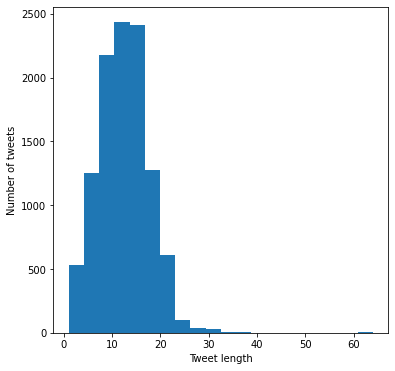

In [ ]:
import matplotlib.pyplot as plt
def plot_hist(tweets):
    sentence_lengths = [len(tokens) for tokens in tweets]
    fig = plt.figure(figsize=(6, 6)) 
    plt.xlabel('Tweet length')
    plt.ylabel('Number of tweets')
    plt.hist(sentence_lengths, bins=20)
    plt.show()
    return sentence_lengths
tweet_lengths = plot_hist(tweets)

평균적인 트윗이 약 12-15개의 단어를 가지고 있고, 거의 60개의 단어에 달하는 단어가 몇 개 있다는 것을 알 수 있습니다.  가장 짧은 트윗의 길이, 가장 긴 트윗의 길이, 그리고 모든 트윗의 평균 길이가 정확히 얼마입니까? 그 값들을 출력하세요.

In [ ]:
# Your code here
print('minimun: {}, maximum: {}, average: {:.2f}'.format(min(tweet_lengths), max(tweet_lengths), sum(tweet_lengths)/len(tweet_lengths)))

minimun: 1, maximum: 64, average: 12.43


데이터에 대해 점점 더 많이 알아가고 있습니다. 더 깊이 들어가 관련 트윗과 관련 없는 트윗의 평균 길이에 차이가 있는지 확인할 수 있는지 살펴보겠습니다. 그것은 향후 분석에서 좋은 특성으로 사용할 수 있을 것입니다.

이를 위해 `df_raw`에서 'choose_one' 열을 사용합니다. 열의 값이 'Relevant'인 경우 트윗은 자연 재해와 관련된 것으로 분류됩니다. 값이 'Not Relevant'인 경우 트윗은 자연 재해와 관련이 없습니다.
  
관련 트윗의 평균 길이와 관련 없는 트윗의 평균 길이를 출력할 수 있습니까?
  
* 힌트 1: 데이터 프레임 `df_result`는 처리 된 트윗과 관련성을 포함하도록 구성되었습니다. 'Relevant' 트윗만 포함된 테이터 프레임과, 'Not Relevant' 트윗만 포함된 데이터 프레임으로 2개를 만듭니다. 이 작업은 데이터 프레임을 부분 집합화하여 수행할 수 있습니다: `df_result[df_result['choose_one']=='Relevant']` 관련성 있는 트윗의 데이터 프레임을 만드는 예제입니다. 관련성 없는 트윗의 데이터 프레임을 만들어 보세요.

* 힌트 2: 각 트윗의 길이를 계산하려면 `.apply(len)` 함수를 사용할 수 있습니다. `.mean()`를 사용하여 결과의 평균을 얻을 수 있습니다.

In [ ]:
df_result = df_raw['choose_one'].copy().to_frame()
df_result['processed_text'] = tweets
df_neg=df_result[df_result['choose_one']=='Not Relevant']
df_pos=df_result[df_result['choose_one']=='Relevant']
print(df_pos['processed_text'].apply(len).mean(), df_neg['processed_text'].apply(len).mean())

12.748127541194094 12.190237594957168


트윗 길이가 좋은 특성이라고 생각하십니까?

## 데이터 분석 과제

배운 기술을 사용하여 노트북 시작 부분에 수집한 데이터(위키피디아)에 텍스트 처리 프로세스를 적용합니다. 여기서 테이터 스크래핑 및 텍스트 처리에 대한 지식을 활용해보세요. 초기와 최종 단어의 크기를 비교해 보십시오

In [ ]:
# your code here
tokenized_raw = [nltk.tokenize.word_tokenize(x) for x in all_para]
print('Initial vocab size {}'.format(len(set([y for x in tokenized_raw for y in x]))))

Initial vocab size 50


In [ ]:
x = pd.DataFrame({'text':all_para}, index = [1])
processed_all_para = tokenizer(x)
print('Final vocab size {}'.format(len(set([y for x in processed_all_para for y in x]))))

Final vocab size 113


다음 내용을 배웠습니다:
1. 텍스트 데이터를 찾는 방법
 - request: 웹 페이지 응답
 - bs4: 웹 스크랩 수행(html5)
2. 스크랩과 다양한 모듈을 사용하여 온라인으로 데이터를 수집하는 방법
 - 웹에서 정보를 가져오는 프로그램 생성
 - html태그 활용: h3, h2(헤딩/소제목), p(문단) 등 검색
3. 이 데이터를 컴퓨터에 저장하는 방법
 - 파이썬 함수 중 파일처리 함수 활용: .write()사용
4. 이 텍스트 데이터를 컴퓨터가 이해할 수 있는 양식으로 처리하는 방법
 - 컴퓨터가 이해할 수 있도록 처리하는 방법:
   1. 전체문단이 있으면 문장 단위로 나눈다.ex) 마침표, 물음표, 느낌표 등 구분
   2. 문장을 띄어쓰기 단위나, 형태소 분석을 수행한다.  
   ex)단순히 어휘의 크기로, 종결 어미 등을 제거하는 방식,  
   형태소 분석은 방식에 따라 다름(Ex,정보 검색을 일반 명사 2개로 나눈 방식 혹은 고유 명사 1개로 나타내는 방식)
   3. 불용어 제거

5. 처리된 데이터를 분석하고 시각화하는 방법
 - 단어의 수(길이) 파악  
   관련 있건 없건 평균 12-15자 내외  
   단어의 길이는 유의미한 데이터는 아님
 - 전체 수 중에 불용어 제거를 한 후 75%미만으로 어휘 수가 줄었음  
   처리 속도 향상  
  데이터 분석 시 무의미한 정보를 제거
